In [1]:
#импорт библиотек
import tensorflow as tf

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os  

In [2]:
#variables
data='brl'

#импорт данных, сделать циклом
data = pd.read_csv(data+'/all_data.csv', sep=',')


In [3]:
#конвертация данных
data['Date'] = pd.to_datetime(data['Date'], dayfirst=False)


In [4]:
data

,Date,USDBRL Curncy,BCN1W BGN Curncy,EURUSD Curncy,GBPUSD Curncy,USDJPY Curncy,USDMXN Curncy,USOSFR2 Curncy,USOSFR10 Curncy,CO1 Comdty,...,DXY Curncy,BRAZIL CDS USD SR 5Y D14 Corp,MEX CDS USD SR 5Y D14 Corp,EURUSDV1M BGN Curncy,W 1 COMB Comdty,C 1 COMB Comdty,KC1 Comdty,USGGBE2 Index,USGGBE10 Index,CESIUSD Index
0,2007-02-01,2.1004,25.00,1.3022,1.9668,120.82,10.9713,5.2437,5.2140,56.72,...,84.640,96.129,42.240,6.2000,460.25,398.00,118.75,2.6056,2.4119,65.6
1,2007-02-02,2.1043,25.00,1.2961,1.9660,121.14,10.9632,5.2087,5.1865,58.41,...,84.960,93.119,39.825,5.9750,461.25,402.00,118.35,2.5953,2.4049,58.5
2,2007-02-05,2.0933,25.00,1.2929,1.9603,120.34,10.9228,5.1887,5.1585,58.10,...,85.080,93.125,39.500,5.7500,458.50,402.00,116.60,2.5875,2.3990,61.3
3,2007-02-06,2.0859,25.00,1.2985,1.9711,120.10,10.9223,5.1637,5.1199,58.42,...,84.770,91.151,39.510,5.8500,451.00,396.50,116.50,2.5513,2.3695,60.4
4,2007-02-07,2.0925,25.00,1.3012,1.9707,120.68,10.9555,5.1437,5.1004,57.23,...,84.710,90.119,39.396,5.8500,452.00,392.25,116.85,2.5488,2.3596,60.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3887,2021-12-27,5.6316,59.00,1.1328,1.3441,114.87,20.6894,0.7375,1.2890,78.60,...,96.093,208.000,91.500,5.6325,804.00,614.75,227.05,2.3792,2.5333,22.9
3888,2021-12-28,5.6275,39.26,1.1310,1.3434,114.82,20.6460,0.7385,1.2941,78.94,...,96.202,206.000,92.500,5.5575,783.50,604.75,225.60,2.3719,2.5302,21.7
3889,2021-12-29,5.6932,68.23,1.1349,1.3490,114.95,20.5711,0.7452,1.3619,79.23,...,95.929,207.000,91.500,5.5550,787.75,605.50,228.90,2.4158,2.5856,20.0
3890,2021-12-30,5.5697,78.02,1.1325,1.3499,115.08,20.4626,0.7307,1.3177,79.32,...,95.968,205.000,90.500,5.4900,779.75,596.00,228.85,2.4431,2.6129,20.0


In [5]:
drop_data = data.copy()

In [6]:
#удаление пустых строчек
drop_data = drop_data.dropna(how='all')

In [7]:
#удаление пропусков спота из-за выходных и праздников
drop_data = drop_data.dropna(subset=['USDBRL Curncy'])


In [8]:
#добавление предыдущих значений признаков в пустые места
for col in drop_data.select_dtypes(include=['int', 'float']):
    while drop_data[col].isnull().any(): 
        drop_data[col] = drop_data[col].fillna(method='ffill')


In [9]:
#вычисление изменения цены

drop_data['devprice'] = (drop_data['USDBRL Curncy'].shift(-1) - (drop_data['USDBRL Curncy'] + (drop_data['BCN1W BGN Curncy'] / 50000))) / drop_data['USDBRL Curncy'].shift(-1)

#перенос последнего столбца на 4-тое место
new_columns = drop_data.columns[:-1].to_list()
new_columns.insert(1, 'devprice')
drop_data = drop_data[new_columns]

drop_data['target'] = drop_data['USDBRL Curncy'] + (drop_data['BCN1W BGN Curncy'] / 50000)
new_columns = drop_data.columns[:-1].to_list()
new_columns.insert(2, 'target')
t_data_0 = drop_data[new_columns]

#удаление 'USDBRL Curncy' и 'BCN1W BGN Curncy' 
t_data = t_data_0.copy()
t_data.drop(['USDBRL Curncy', 'BCN1W BGN Curncy'], axis=1, inplace=True)
t_data.drop(t_data.tail(1).index, inplace=True)

In [10]:
#вычисление таргета



In [11]:
t_data

,Date,devprice,target,EURUSD Curncy,GBPUSD Curncy,USDJPY Curncy,USDMXN Curncy,USOSFR2 Curncy,USOSFR10 Curncy,CO1 Comdty,...,DXY Curncy,BRAZIL CDS USD SR 5Y D14 Corp,MEX CDS USD SR 5Y D14 Corp,EURUSDV1M BGN Curncy,W 1 COMB Comdty,C 1 COMB Comdty,KC1 Comdty,USGGBE2 Index,USGGBE10 Index,CESIUSD Index
0,2007-02-01,0.001616,2.100900,1.3022,1.9668,120.82,10.9713,5.2437,5.2140,56.72,...,84.640,96.129,42.240,6.2000,460.25,398.00,118.75,2.6056,2.4119,65.6
1,2007-02-02,-0.005494,2.104800,1.2961,1.9660,121.14,10.9632,5.2087,5.1865,58.41,...,84.960,93.119,39.825,5.9750,461.25,402.00,118.35,2.5953,2.4049,58.5
2,2007-02-05,-0.003787,2.093800,1.2929,1.9603,120.34,10.9228,5.1887,5.1585,58.10,...,85.080,93.125,39.500,5.7500,458.50,402.00,116.60,2.5875,2.3990,61.3
3,2007-02-06,0.002915,2.086400,1.2985,1.9711,120.10,10.9223,5.1637,5.1199,58.42,...,84.770,91.151,39.510,5.8500,451.00,396.50,116.50,2.5513,2.3695,60.4
4,2007-02-07,-0.000048,2.093000,1.3012,1.9707,120.68,10.9555,5.1437,5.1004,57.23,...,84.710,90.119,39.396,5.8500,452.00,392.25,116.85,2.5488,2.3596,60.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3885,2021-12-23,-0.008289,5.678280,1.1327,1.3408,114.39,20.6433,0.7190,1.3076,76.85,...,96.019,212.000,93.500,5.3325,814.75,605.75,231.20,2.3405,2.4952,23.9
3887,2021-12-27,-0.000938,5.632780,1.1328,1.3441,114.87,20.6894,0.7375,1.2890,78.60,...,96.093,208.000,91.500,5.6325,804.00,614.75,227.05,2.3792,2.5333,22.9
3888,2021-12-28,0.011402,5.628285,1.1310,1.3434,114.82,20.6460,0.7385,1.2941,78.94,...,96.202,206.000,92.500,5.5575,783.50,604.75,225.60,2.3719,2.5302,21.7
3889,2021-12-29,-0.022419,5.694565,1.1349,1.3490,114.95,20.5711,0.7452,1.3619,79.23,...,95.929,207.000,91.500,5.5550,787.75,605.50,228.90,2.4158,2.5856,20.0


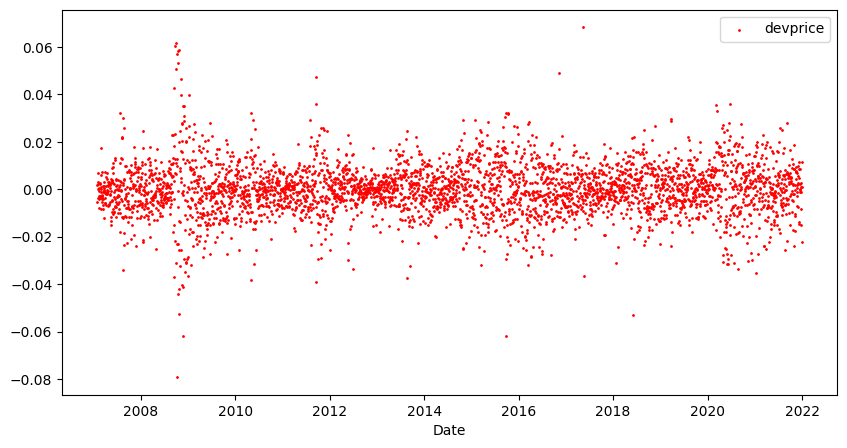

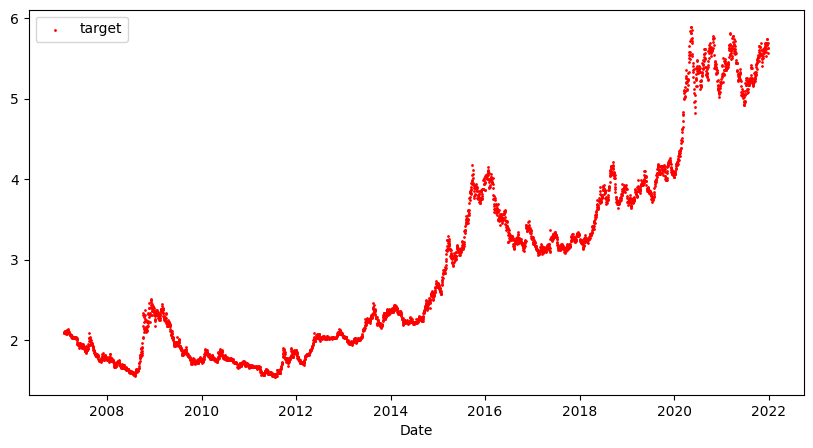

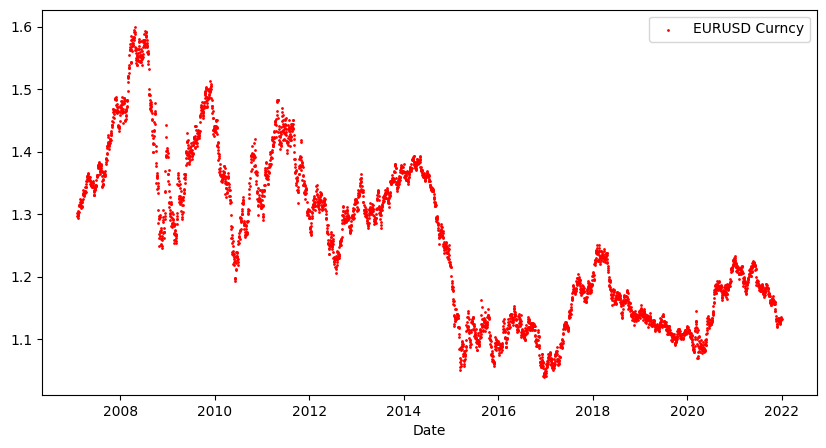

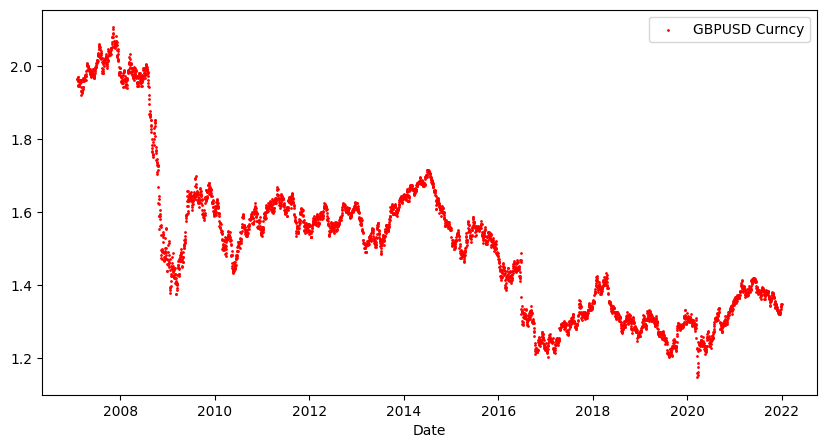

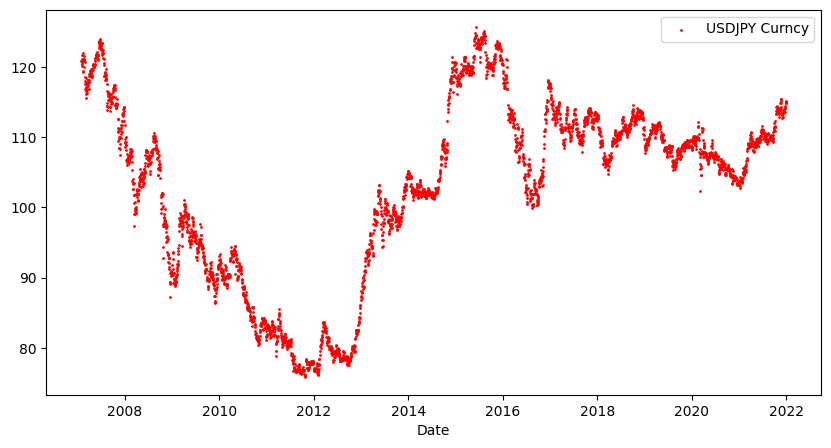

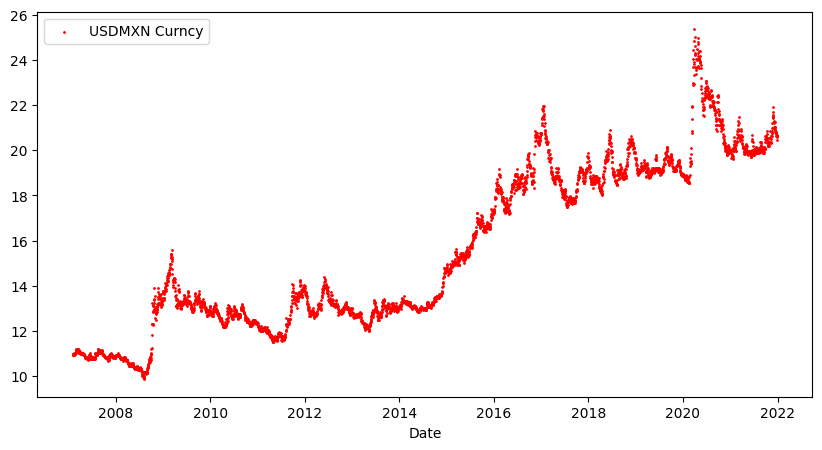

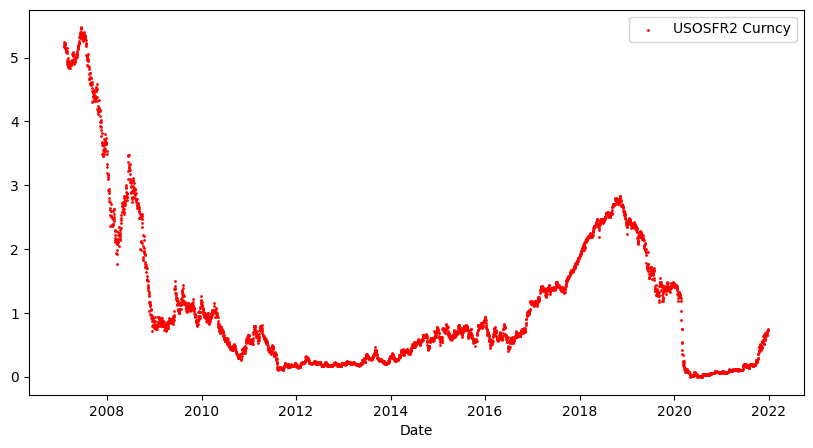

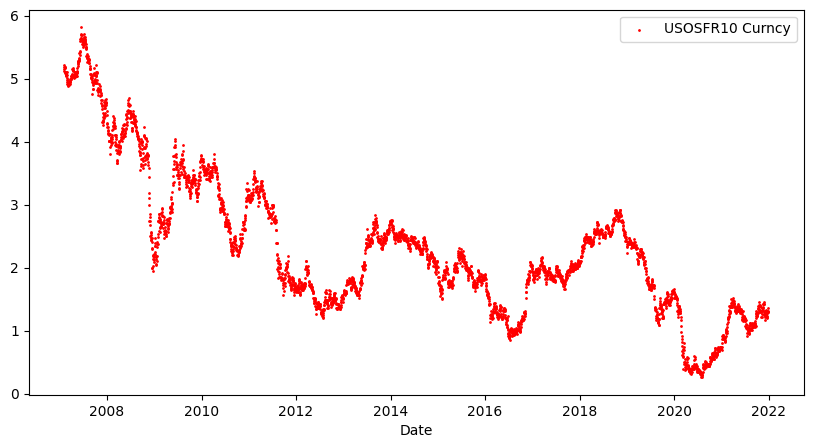

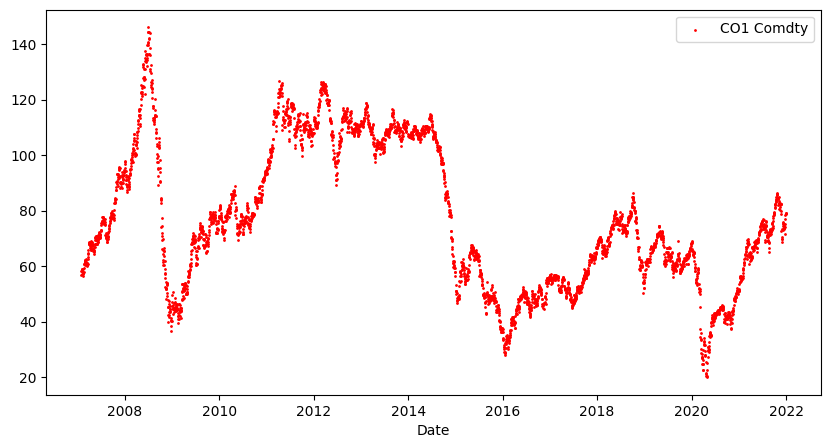

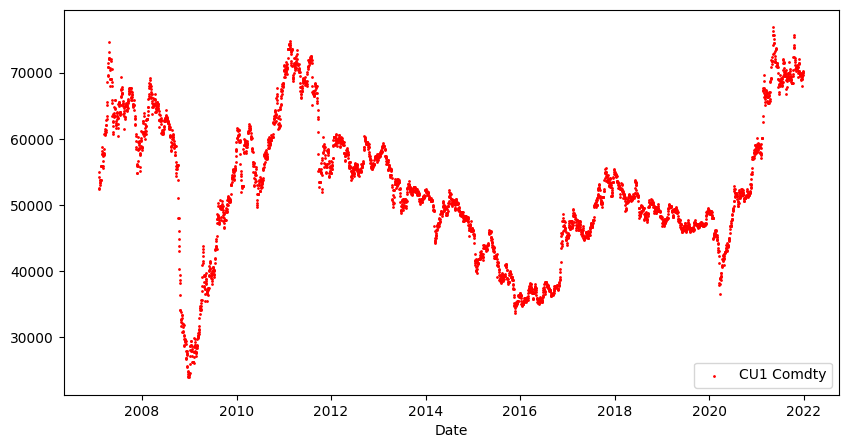

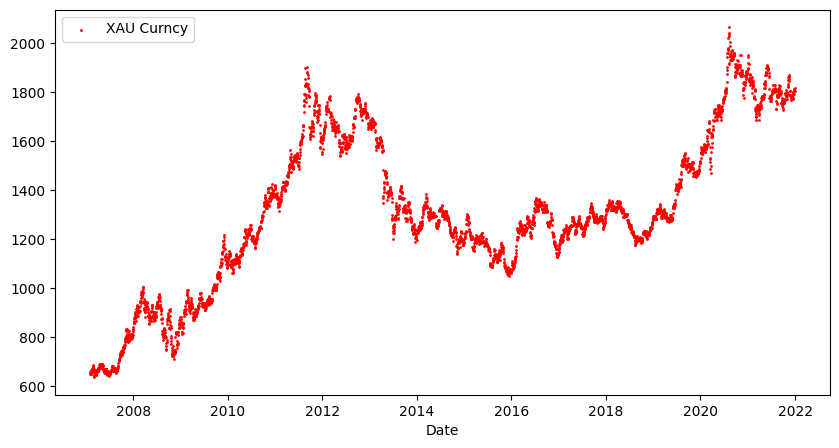

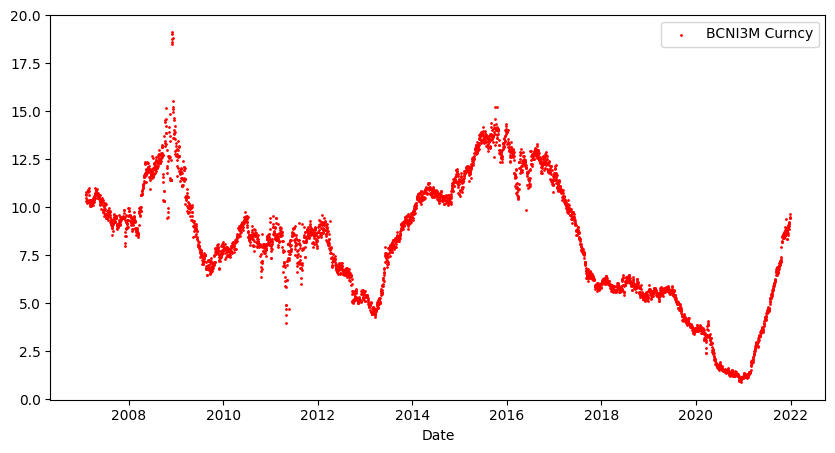

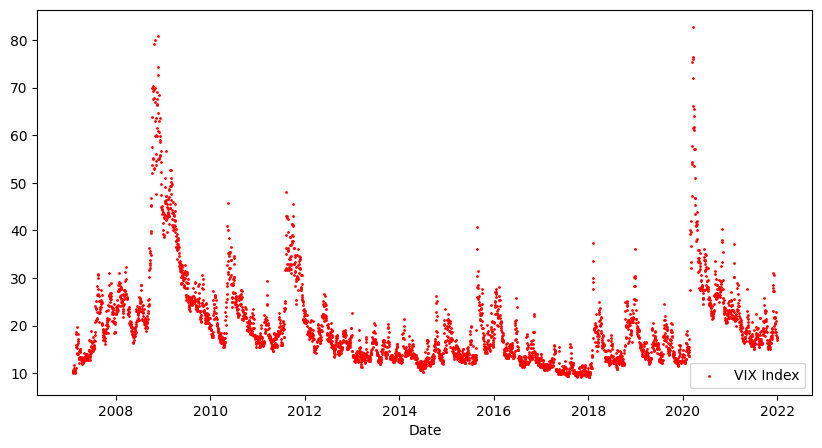

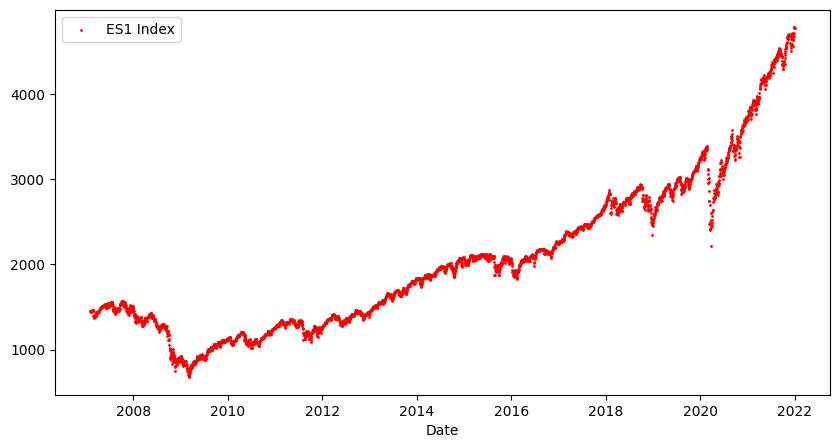

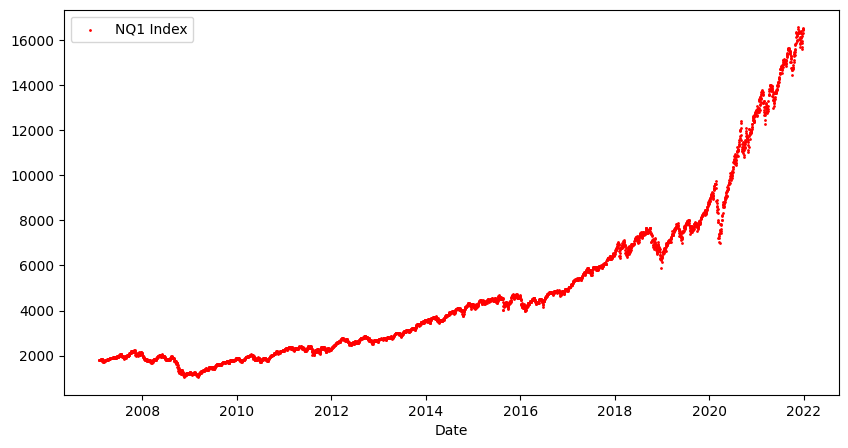

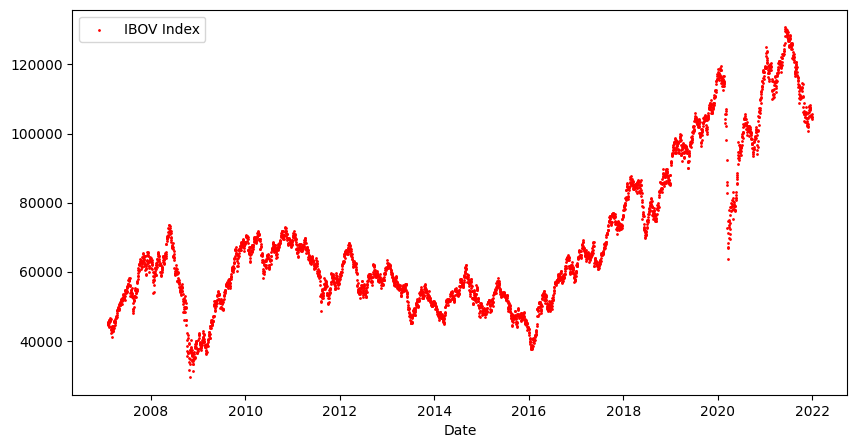

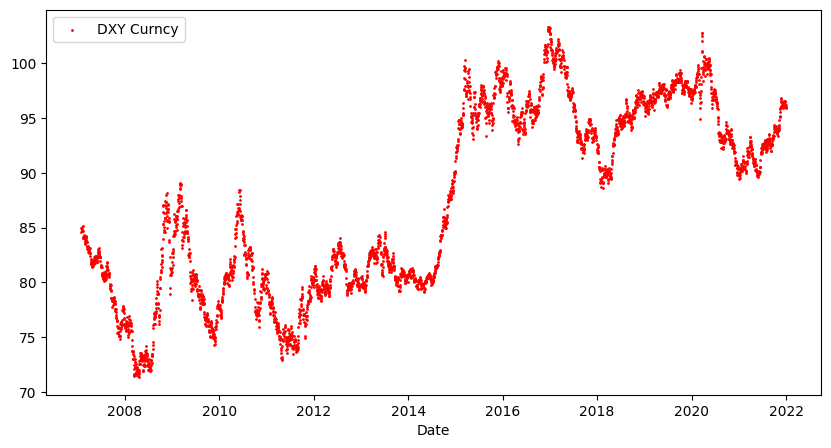

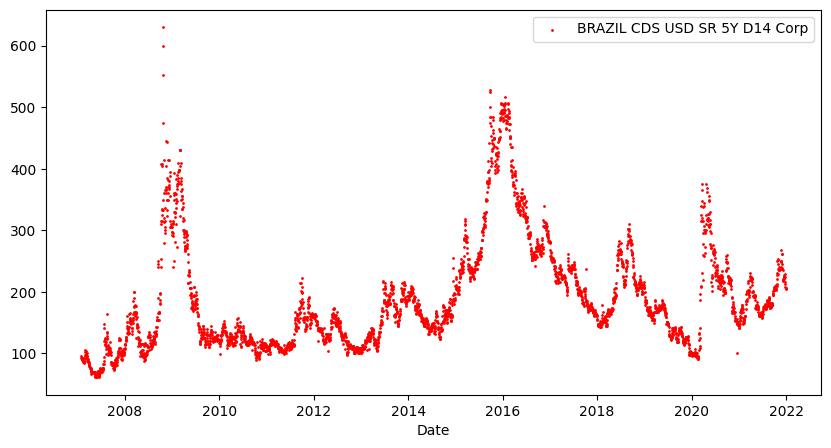

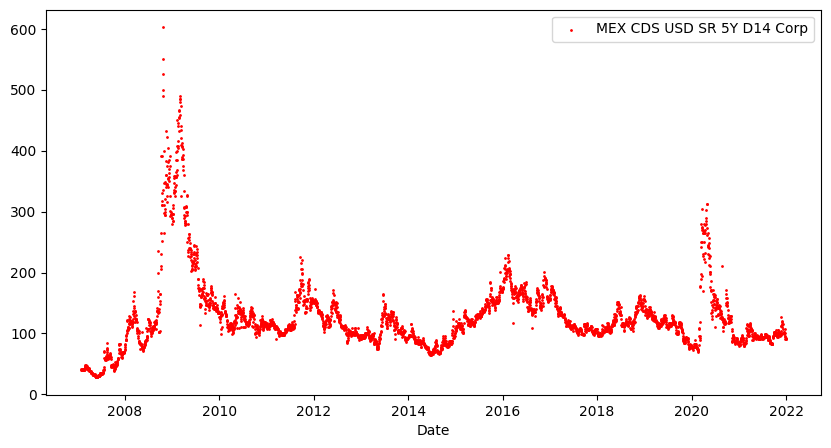

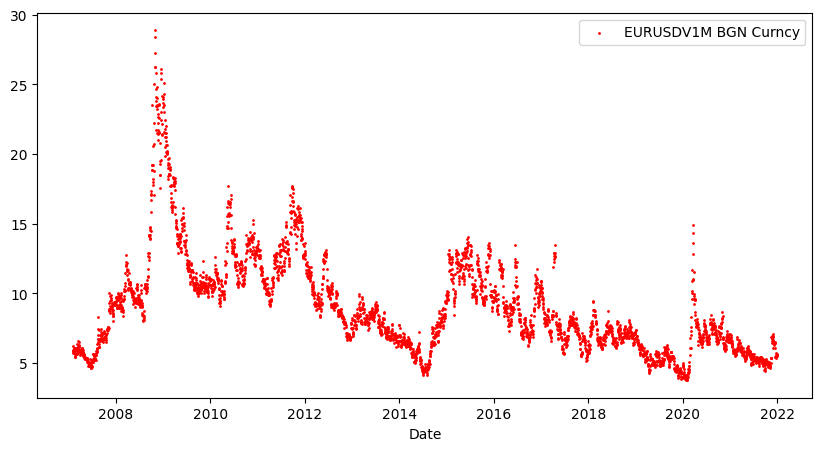

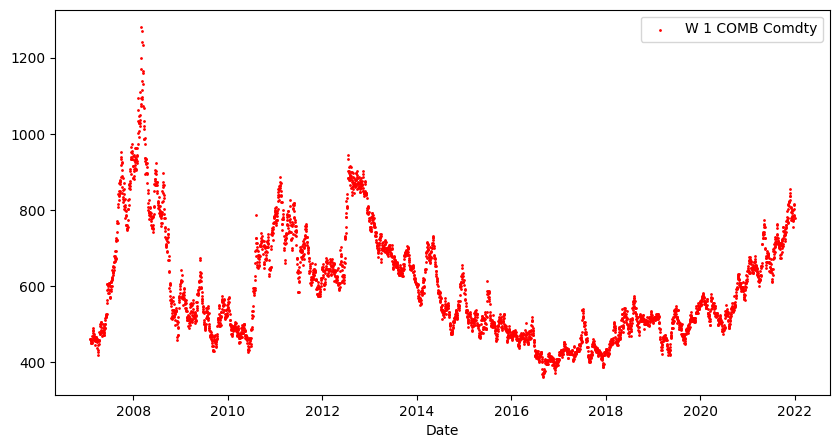

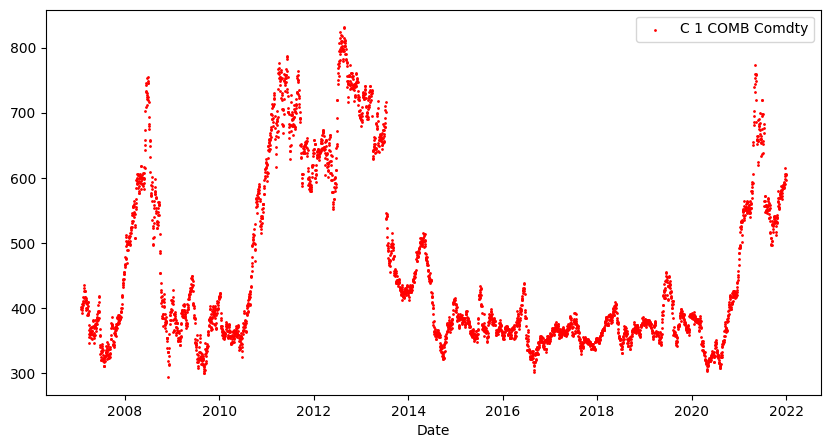

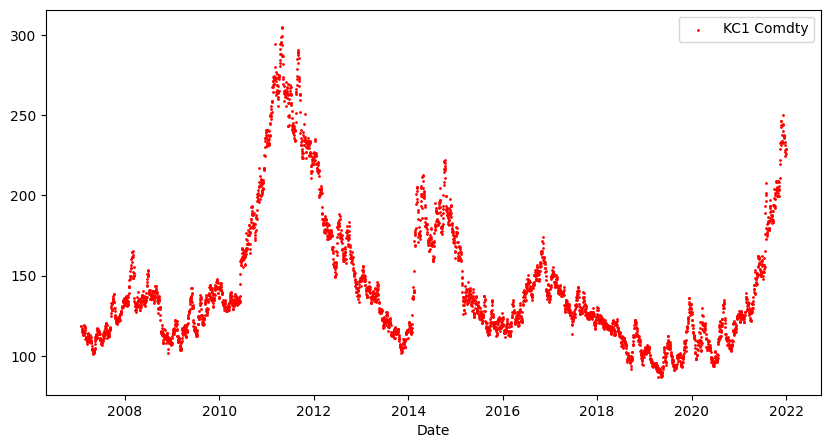

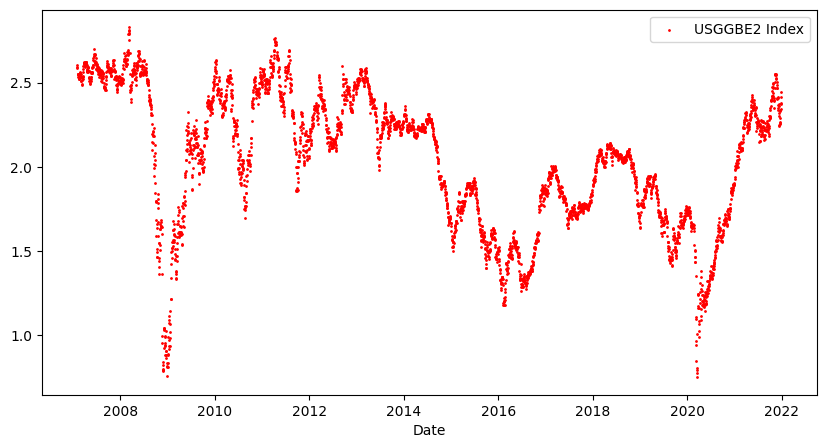

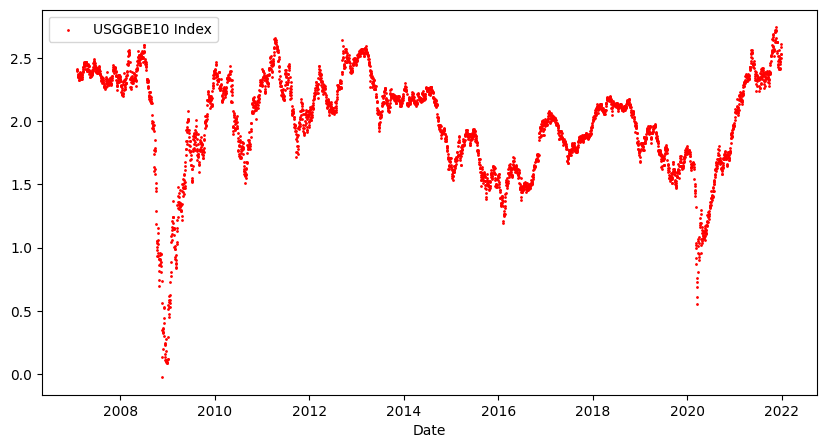

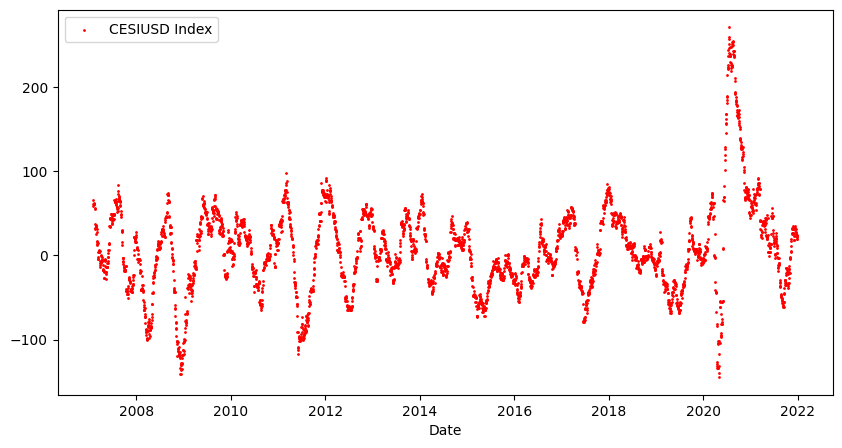

In [12]:
# построение графиков разпределения признаков для различных классов

# Перебор столбцов и построение графиков
for column in t_data.columns:
    if column not in ['Date']:
        fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
        axes.scatter(
        x=t_data['Date'],
        y=t_data[column],
        s=1,
        marker='o',
        c = 'red',
        label=column
        );

    
                # Настройка осей и заголовка
        plt.xlabel('Date')
        #axes[0].set_ylabel(column)
        #axes[1].set_ylabel(column)
            
        # Добавление легенды
        axes.legend()
                
                    # Отображение графика
        plt.show()

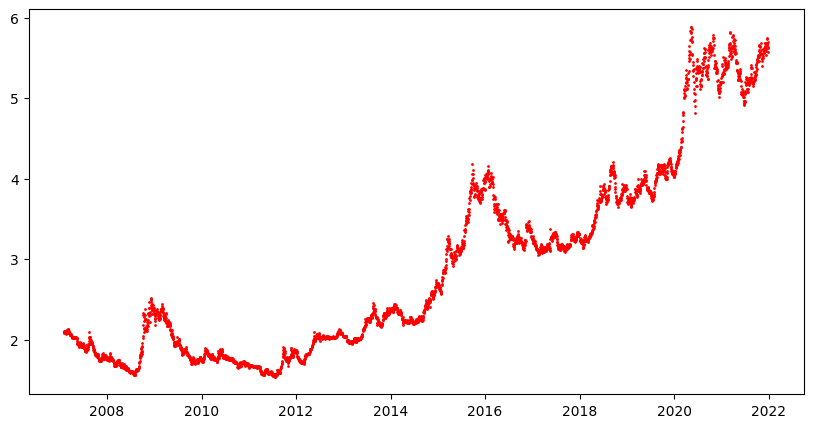

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
axes.scatter(
    x=t_data['Date'],
    y=t_data['target'],
    s=1,
    marker='o',
    c = 'red'
);

In [14]:
t_data.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Date,3755,2014-07-07 00:49:28.202396928,2007-02-01 00:00:00,2010-10-06 12:00:00,2014-07-07 00:00:00,2018-04-03 12:00:00,2021-12-30 00:00:00,NaN
devprice,3755.0,-0.00007,-0.07924,-0.005884,-0.000054,0.005883,0.068323,0.010827
target,3755.0,2.922968,1.53945,1.876783,2.3801,3.757747,5.88764,1.207249
EURUSD Curncy,3755.0,1.258541,1.0388,1.13435,1.2525,1.3582,1.5991,0.130565
GBPUSD Curncy,3755.0,1.519371,1.1485,1.3276,1.5245,1.61545,2.1075,0.213321
USDJPY Curncy,3755.0,102.798123,75.82,93.77,106.28,111.38,125.63,12.708885
USDMXN Curncy,3755.0,15.582906,9.8581,12.7652,13.8272,19.0268,25.3588,3.618855
USOSFR2 Curncy,3755.0,1.154606,-0.0092,0.2742,0.7157,1.46465,5.4752,1.204237
USOSFR10 Curncy,3755.0,2.329548,0.2612,1.55965,2.1072,2.81925,5.8163,1.130269
CO1 Comdty,3755.0,76.687822,19.99,56.125,71.9,102.905,146.08,25.579646


In [15]:
#выеление тестового набора для сохранения ненормализованных значений
n = len(t_data)
test_df_0 = t_data[int(n*0.8):]

In [16]:
# Преобразование datetime в дни
data_start=t_data['Date'].min()
t_data['Date'] = (t_data['Date'] - data_start).dt.days

In [17]:
#нормализация данных к диапазону от -5 до 5
t_data=t_data.drop('devprice', axis=1)
for column in t_data.columns:
    if column not in ['target']:
        t_data[column]=(t_data[column]-t_data[column].min())*(1/(t_data[column].max()-t_data[column].min()))

In [18]:
t_data.describe()

,Date,target,EURUSD Curncy,GBPUSD Curncy,USDJPY Curncy,USDMXN Curncy,USOSFR2 Curncy,USOSFR10 Curncy,CO1 Comdty,CU1 Comdty,...,DXY Curncy,BRAZIL CDS USD SR 5Y D14 Corp,MEX CDS USD SR 5Y D14 Corp,EURUSDV1M BGN Curncy,W 1 COMB Comdty,C 1 COMB Comdty,KC1 Comdty,USGGBE2 Index,USGGBE10 Index,CESIUSD Index
count,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,...,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000
mean,0.498170,2.922968,0.392185,0.386727,0.541621,0.369326,0.212203,0.372333,0.449662,0.538280,...,0.499231,0.223819,0.174054,0.210479,0.253566,0.305092,0.264184,0.619139,0.723662,0.362065
std,0.289208,1.207249,0.233027,0.222441,0.255147,0.233464,0.219575,0.203465,0.202868,0.194951,...,0.264791,0.152897,0.106498,0.141856,0.153385,0.245017,0.190768,0.193946,0.147202,0.125758
min,0.000000,1.539450,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.246695,1.876783,0.170534,0.186757,0.360369,0.187546,0.051674,0.233740,0.286581,0.429315,...,0.273451,0.111958,0.120719,0.110005,0.138194,0.127383,0.136082,0.474179,0.638142,0.288637
50%,0.498164,2.380100,0.381403,0.392075,0.611524,0.256059,0.132175,0.332307,0.411690,0.519682,...,0.456132,0.184057,0.152060,0.177601,0.205658,0.178522,0.208247,0.644576,0.753254,0.356042
75%,0.749082,3.757747,0.570052,0.486913,0.713913,0.591502,0.268735,0.460487,0.657586,0.668055,...,0.756482,0.287808,0.199114,0.281931,0.348205,0.482334,0.339290,0.776903,0.833333,0.434280
max,1.000000,5.887640,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
#разбиение данных
column_indices = {name: i for i, name in enumerate(t_data.columns)}


train_df = t_data[0:int(n*0.6)]
val_df = t_data[int(n*0.6):int(n*0.8)]
test_df = t_data[int(n*0.8):]


In [21]:
#создание класса окна
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [22]:
#сплит с учетом 
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [23]:
def plot(self, model=None, plot_col='target', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('days')

WindowGenerator.plot = plot

In [24]:
# создание tf.data.Dataset
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=20,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [25]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [26]:
#Одноступенчатые модели

In [27]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['target'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['target']

In [28]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')


Inputs shape (batch, time, features): (20, 1, 26)
Labels shape (batch, time, features): (20, 1, 1)


In [29]:
#базовый прогноз, озвращает текущую цену в качестве прогноза, прогнозируя «без изменений»
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]


In [30]:
baseline = Baseline(label_index=column_indices['target'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)


38/38 [==============================] - 0s 2ms/step - loss: 0.0013 - mean_absolute_error: 0.0262


In [31]:
wide_window = WindowGenerator(
    input_width=30, label_width=30, shift=1,
    label_columns=['target'])



wide_window

Total window size: 31
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
Label column name(s): ['target']

In [32]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)


Input shape: (20, 30, 26)
Output shape: (20, 30, 1)


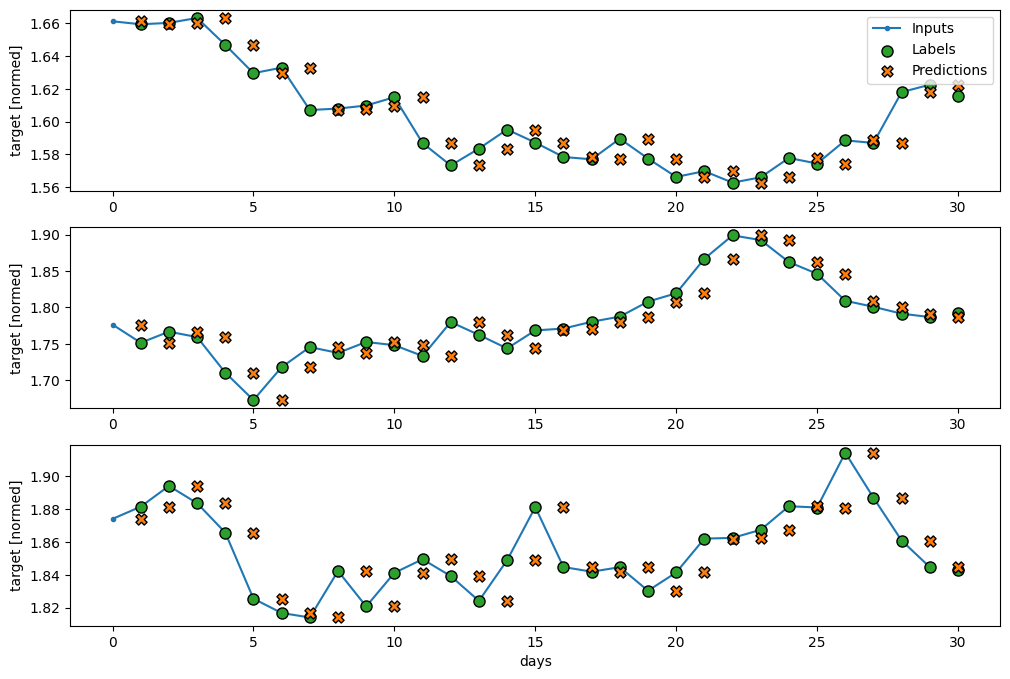

In [33]:
wide_window.plot(baseline)
#это просто метки, сдвинутые вправо на один день
    #Синяя линия Inputs показывает входную температуру на каждом временном шаге. Модель получает все функции, этот график показывает только температуру.
    #Зеленые точки Labels показывают целевое значение прогноза. Эти точки отображаются во время прогнозирования, а не во время ввода. Поэтому диапазон меток смещен на 1 шаг относительно входов.
    #Оранжевые кресты Predictions — это прогнозы модели для каждого выходного временного шага. Если бы модель предсказывала идеально, прогнозы попадали бы прямо в Labels .

In [34]:
# линейная модель
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])


In [35]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)


Input shape: (20, 1, 26)
Output shape: (20, 1, 1)


In [36]:
MAX_EPOCHS = 100

def compile_and_fit(model, window, patience=30):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [37]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)


Epoch 1/100
113/113 [==============================] - 1s 4ms/step - loss: 3.6036 - mean_absolute_error: 1.7278 - val_loss: 8.4729 - val_mean_absolute_error: 2.9000
Epoch 2/100
113/113 [==============================] - 0s 3ms/step - loss: 1.0712 - mean_absolute_error: 0.7945 - val_loss: 4.3088 - val_mean_absolute_error: 2.0624
Epoch 3/100
113/113 [==============================] - 0s 3ms/step - loss: 0.4917 - mean_absolute_error: 0.5024 - val_loss: 2.7800 - val_mean_absolute_error: 1.6518
Epoch 4/100
113/113 [==============================] - 0s 3ms/step - loss: 0.3774 - mean_absolute_error: 0.4697 - val_loss: 2.1702 - val_mean_absolute_error: 1.4567
Epoch 5/100
113/113 [==============================] - 0s 3ms/step - loss: 0.3203 - mean_absolute_error: 0.4416 - val_loss: 1.8077 - val_mean_absolute_error: 1.3275
Epoch 6/100
113/113 [==============================] - 0s 3ms/step - loss: 0.2692 - mean_absolute_error: 0.4076 - val_loss: 1.5098 - val_mean_absolute_error: 1.2111
Epoch 7/10

In [38]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)


Input shape: (20, 30, 26)
Output shape: (20, 30, 1)


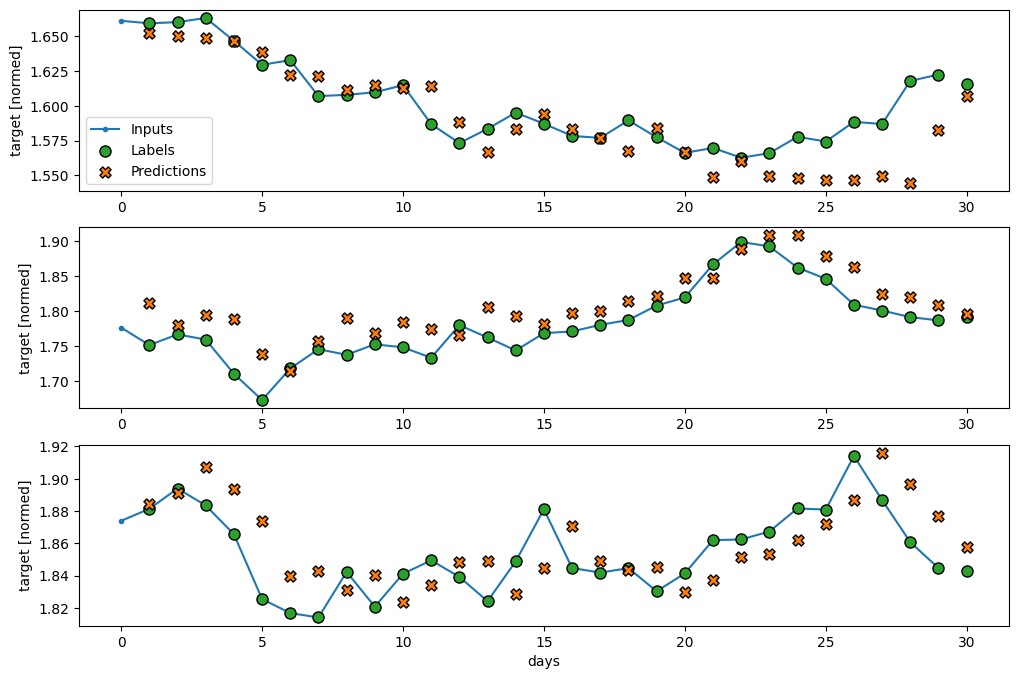

In [39]:
wide_window.plot(linear)


In [40]:
test_df

,Date,target,EURUSD Curncy,GBPUSD Curncy,USDJPY Curncy,USDMXN Curncy,USOSFR2 Curncy,USOSFR10 Curncy,CO1 Comdty,CU1 Comdty,...,DXY Curncy,BRAZIL CDS USD SR 5Y D14 Corp,MEX CDS USD SR 5Y D14 Corp,EURUSDV1M BGN Curncy,W 1 COMB Comdty,C 1 COMB Comdty,KC1 Comdty,USGGBE2 Index,USGGBE10 Index,CESIUSD Index
3110,0.799486,3.759808,0.179547,0.119187,0.639631,0.630359,0.408686,0.354629,0.285193,0.440575,...,0.781208,0.244725,0.216482,0.143056,0.166213,0.160391,0.071019,0.425546,0.615582,0.287915
3111,0.799669,3.715908,0.179725,0.129093,0.656294,0.616688,0.428926,0.376177,0.293996,0.432059,...,0.777267,0.228898,0.202553,0.122947,0.169750,0.166434,0.068499,0.462845,0.645372,0.320173
3112,0.800220,3.733108,0.193825,0.134724,0.660510,0.613121,0.437495,0.381379,0.296138,0.442468,...,0.761221,0.214830,0.186883,0.121055,0.169478,0.165040,0.073769,0.472952,0.652495,0.318970
3113,0.800404,3.714308,0.187935,0.128467,0.661112,0.612508,0.446430,0.387356,0.307162,0.441900,...,0.768634,0.221864,0.192106,0.118965,0.170566,0.160855,0.084307,0.492685,0.667064,0.326432
3114,0.800588,3.681147,0.206140,0.135975,0.649468,0.604211,0.441324,0.383197,0.328733,0.446631,...,0.747240,0.206917,0.179048,0.127626,0.173014,0.164575,0.085452,0.496054,0.668800,0.327636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3885,0.998715,5.678280,0.167589,0.200521,0.774343,0.695788,0.132777,0.188367,0.450948,0.867146,...,0.772262,0.264948,0.113755,0.062120,0.493743,0.580660,0.662314,0.765040,0.910810,0.405633
3887,0.999449,5.632780,0.167767,0.203962,0.783979,0.698762,0.136150,0.185019,0.464827,0.863550,...,0.774577,0.257914,0.110272,0.074067,0.482046,0.597397,0.643299,0.783665,0.924584,0.403226
3888,0.999633,5.628285,0.164555,0.203233,0.782975,0.695962,0.136332,0.185937,0.467523,0.874716,...,0.777986,0.254397,0.112013,0.071080,0.459739,0.578801,0.636655,0.780152,0.923463,0.400337
3889,0.999816,5.694565,0.171515,0.209072,0.785585,0.691130,0.137554,0.198142,0.469823,0.871499,...,0.769447,0.256155,0.110272,0.070981,0.464363,0.580195,0.651775,0.801280,0.943492,0.396245


In [41]:
target_ln=linear.predict(test_df)
target_ln.shape
target_ln

24/24 [==============================] - 0s 1ms/step


array([[3.6652532],
       [3.639486 ],
       [3.6449473],
       [3.6341376],
       [3.600159 ],
       [3.618336 ],
       [3.6288996],
       [3.6125183],
       [3.6308973],
       [3.635277 ],
       [3.6534383],
       [3.653957 ],
       [3.6632302],
       [3.6895022],
       [3.6560376],
       [3.6628885],
       [3.6593952],
       [3.6656098],
       [3.627458 ],
       [3.6087856],
       [3.5823205],
       [3.58983  ],
       [3.598126 ],
       [3.595461 ],
       [3.6246727],
       [3.6351807],
       [3.6483104],
       [3.6728964],
       [3.6412804],
       [3.678574 ],
       [3.6416192],
       [3.6284542],
       [3.6499019],
       [3.6404285],
       [3.65046  ],
       [3.6785495],
       [3.660927 ],
       [3.662125 ],
       [3.667989 ],
       [3.6531825],
       [3.6747134],
       [3.6969879],
       [3.7396185],
       [3.7709107],
       [3.7544835],
       [3.7407348],
       [3.7156527],
       [3.7233064],
       [3.7404814],
       [3.7205708],


In [42]:
df_ln = test_df_0.iloc[0:, 0:3]
df_ln

,Date,devprice,target
3110,2019-01-03,-0.011925,3.759808
3111,2019-01-04,0.004499,3.715908
3112,2019-01-07,-0.005172,3.733108
3113,2019-01-08,-0.009103,3.714308
3114,2019-01-09,0.008258,3.681147
...,...,...,...
3885,2021-12-23,-0.008289,5.678280
3887,2021-12-27,-0.000938,5.632780
3888,2021-12-28,0.011402,5.628285
3889,2021-12-29,-0.022419,5.694565


In [43]:
df_ln.loc[:,'target_ln']=target_ln
#df_ln['Date']=df_ln['Date'].apply(lambda x: data_start + pd.Timedelta(days=x))
df_ln = df_ln[['Date', 'devprice', 'target', 'target_ln']]
df_ln['pnl']=(df_ln['target_ln']/5)*df_ln['devprice']
df_ln['sum']=df_ln["pnl"].cumsum()
sharp=(df_ln['sum'].mean()*255**0.5)/df_ln['sum'].std()
print(df_ln, sharp)


           Date  devprice    target  target_ln       pnl       sum
3110 2019-01-03 -0.011925  3.759808   3.665253 -0.008742 -0.008742
3111 2019-01-04  0.004499  3.715908   3.639486  0.003275 -0.005467
3112 2019-01-07 -0.005172  3.733108   3.644947 -0.003770 -0.009238
3113 2019-01-08 -0.009103  3.714308   3.634138 -0.006617 -0.015854
3114 2019-01-09  0.008258  3.681147   3.600159  0.005946 -0.009908
...         ...       ...       ...        ...       ...       ...
3885 2021-12-23 -0.008289  5.678280   5.297323 -0.008782  0.204351
3887 2021-12-27 -0.000938  5.632780   5.278900 -0.000991  0.203360
3888 2021-12-28  0.011402  5.628285   5.271165  0.012021  0.215381
3889 2021-12-29 -0.022419  5.694565   5.314130 -0.023827  0.191554
3890 2021-12-30  0.000814  5.571260   5.221876  0.000850  0.192404

[751 rows x 6 columns] 22.56617590865568


In [44]:
# плотный слой

In [45]:
CONV_WIDTH = 30
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['target'])

conv_window


Total window size: 31
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Label indices: [30]
Label column name(s): ['target']

Text(0.5, 1.0, 'Given 3 days of inputs, predict 1 day into the future.')

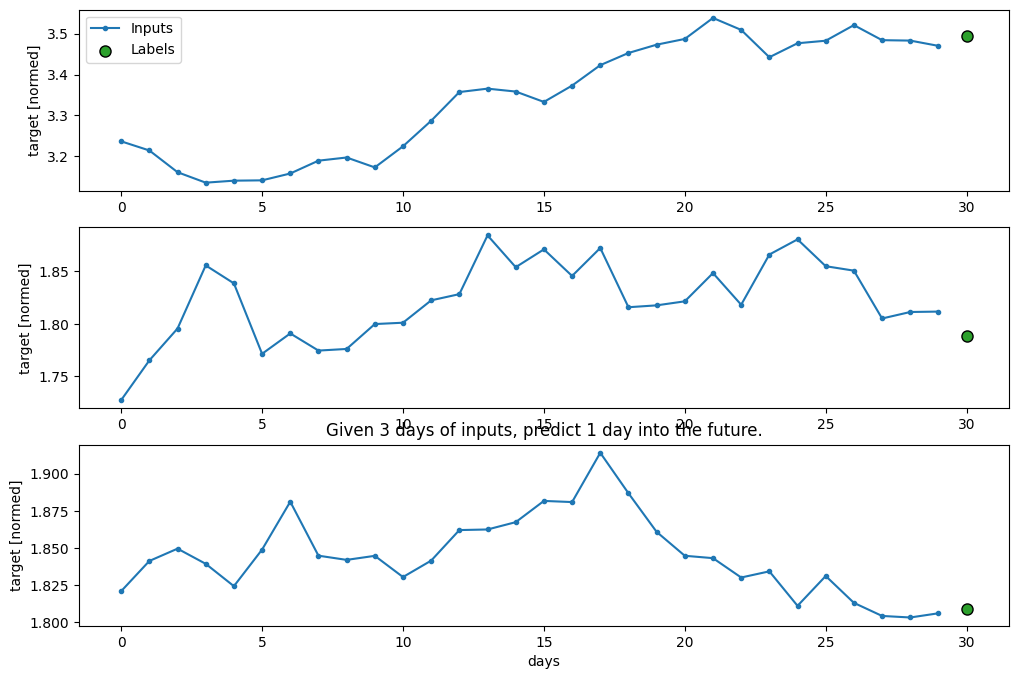

In [46]:
conv_window.plot()
plt.title("Given 3 days of inputs, predict 1 day into the future.")

In [47]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])


In [48]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)


Input shape: (20, 30, 26)
Output shape: (20, 1, 1)


In [49]:
history = compile_and_fit(multi_step_dense, conv_window)

val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)


Epoch 1/100
112/112 [==============================] - 1s 5ms/step - loss: 0.3099 - mean_absolute_error: 0.2449 - val_loss: 0.0333 - val_mean_absolute_error: 0.1329
Epoch 2/100
112/112 [==============================] - 1s 4ms/step - loss: 0.0079 - mean_absolute_error: 0.0679 - val_loss: 0.0414 - val_mean_absolute_error: 0.1607
Epoch 3/100
112/112 [==============================] - 1s 4ms/step - loss: 0.0064 - mean_absolute_error: 0.0602 - val_loss: 0.0350 - val_mean_absolute_error: 0.1499
Epoch 4/100
112/112 [==============================] - 0s 3ms/step - loss: 0.0055 - mean_absolute_error: 0.0541 - val_loss: 0.0429 - val_mean_absolute_error: 0.1750
Epoch 5/100
112/112 [==============================] - 0s 4ms/step - loss: 0.0048 - mean_absolute_error: 0.0508 - val_loss: 0.0314 - val_mean_absolute_error: 0.1473
Epoch 6/100
112/112 [==============================] - 0s 4ms/step - loss: 0.0049 - mean_absolute_error: 0.0510 - val_loss: 0.0512 - val_mean_absolute_error: 0.2004
Epoch 7/10

In [50]:
from IPython.display import clear_output

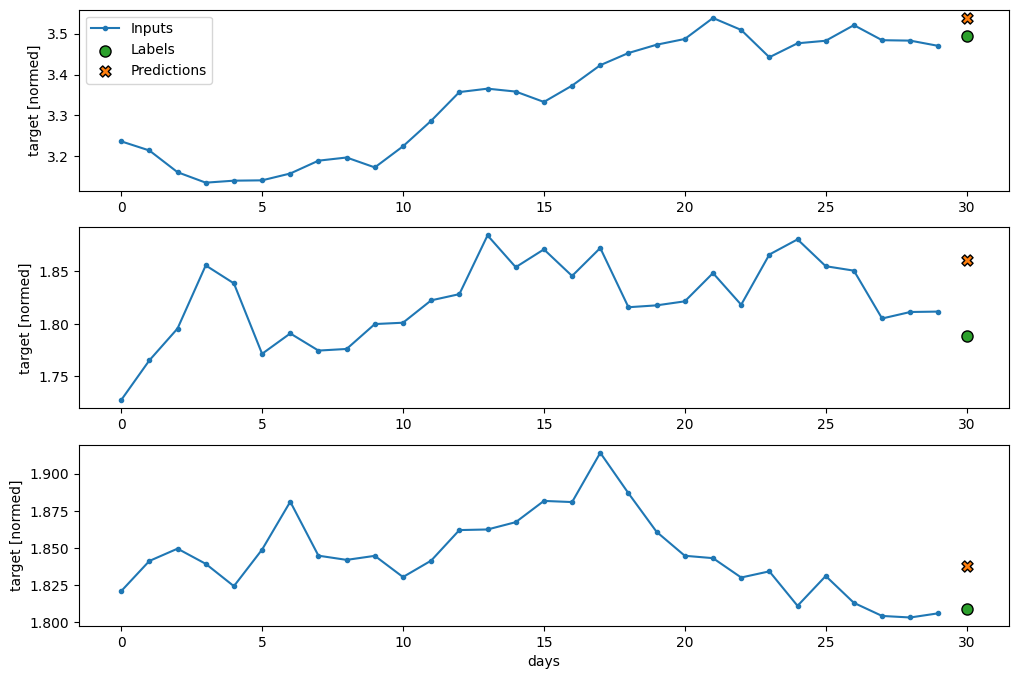

In [51]:
conv_window.plot(multi_step_dense)


In [52]:
test_window = WindowGenerator(
    input_width=30, label_width=1, shift=1,
    label_columns=['target'])
target_msd_0=multi_step_dense.predict(test_window.test)
target_msd_0.shape

37/37 [==============================] - 0s 2ms/step


(721, 1, 1)

In [53]:
target_msd_1 = np.squeeze(target_msd_0)
target_msd_2=(target_msd_1.shift(-1) - (target_msd_1)) / target_msd_1.shift(-1)
target_msd=(target_msd_1-target_msd_1.min())*(10/(t_data['devprice'].max()-t_data['devprice'].min()))-5
df_msd = test_df_0.iloc[30:, 0:3]
df_msd['target_msd']=target_msd

df_msd = df_msd[['Date', 'devprice', 'target', 'target_msd']]
df_msd['pnl']=(df_msd['target_msd']/5)*df_msd['devprice']
df_msd['sum']=df_msd["pnl"].cumsum()
sharp=(df_msd['sum'].mean()*255**0.5)/df_msd['sum'].std()
print(df_msd, sharp)

           Date  devprice    target  target_msd       pnl       sum
3140 2019-02-14 -0.004841  3.719319    3.898921 -0.003775 -0.003775
3141 2019-02-15  0.008962  3.701925    3.849685  0.006900  0.003125
3142 2019-02-18 -0.003788  3.735898    4.089580 -0.003098  0.000027
3143 2019-02-19  0.002145  3.722299    5.304415  0.002275  0.002302
3144 2019-02-20  0.008475  3.730811    5.216212  0.008842  0.011144
...         ...       ...       ...         ...       ...       ...
3885 2021-12-23 -0.008289  5.678280    5.362906 -0.008891  0.265457
3887 2021-12-27 -0.000938  5.632780    5.353652 -0.001005  0.264452
3888 2021-12-28  0.011402  5.628285    5.501989  0.012547  0.276999
3889 2021-12-29 -0.022419  5.694565    4.507648 -0.020211  0.256788
3890 2021-12-30  0.000814  5.571260    5.245657  0.000854  0.257642

[721 rows x 6 columns] 28.296022975066947


In [54]:
#сверточная нейронная сеть
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=25,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=20, activation='relu'),
    tf.keras.layers.Dense(units=1),
])


In [55]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)


Conv model on `conv_window`
Input shape: (20, 30, 26)
Output shape: (20, 1, 1)


In [56]:
history = compile_and_fit(conv_model, conv_window)

#IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)


Epoch 1/100
112/112 [==============================] - 2s 5ms/step - loss: 0.4648 - mean_absolute_error: 0.3600 - val_loss: 0.0307 - val_mean_absolute_error: 0.1344
Epoch 2/100
112/112 [==============================] - 0s 4ms/step - loss: 0.0085 - mean_absolute_error: 0.0687 - val_loss: 0.0311 - val_mean_absolute_error: 0.1395
Epoch 3/100
112/112 [==============================] - 0s 4ms/step - loss: 0.0071 - mean_absolute_error: 0.0618 - val_loss: 0.0403 - val_mean_absolute_error: 0.1644
Epoch 4/100
112/112 [==============================] - 0s 4ms/step - loss: 0.0068 - mean_absolute_error: 0.0601 - val_loss: 0.0331 - val_mean_absolute_error: 0.1484
Epoch 5/100
112/112 [==============================] - 0s 3ms/step - loss: 0.0056 - mean_absolute_error: 0.0541 - val_loss: 0.0336 - val_mean_absolute_error: 0.1515
Epoch 6/100
112/112 [==============================] - 0s 4ms/step - loss: 0.0052 - mean_absolute_error: 0.0522 - val_loss: 0.0342 - val_mean_absolute_error: 0.1551
Epoch 7/10

In [57]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)


Wide window
Input shape: (20, 30, 26)
Labels shape: (20, 30, 1)
Output shape: (20, 1, 1)


In [58]:
LABEL_WIDTH = 50
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['target'])

wide_conv_window

Total window size: 80
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78]
Label indices: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77
 78 79]
Label column name(s): ['target']

In [59]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)


Wide conv window
Input shape: (20, 79, 26)
Labels shape: (20, 50, 1)
Output shape: (20, 50, 1)


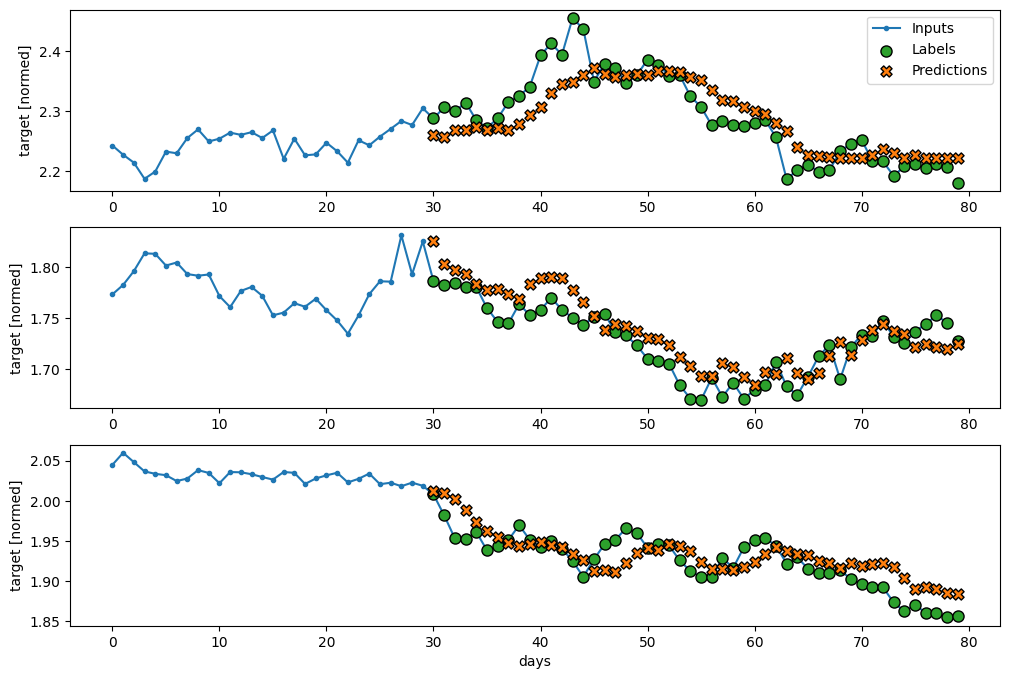

In [60]:
wide_conv_window.plot(conv_model)


In [61]:
test_window = WindowGenerator(
    input_width=30, label_width=1, shift=1,
    label_columns=['target'])
target_conv_0=conv_model.predict(test_window.test)
target_conv_0.shape


37/37 [==============================] - 0s 3ms/step


(721, 1, 1)

In [62]:
target_conv = np.squeeze(target_conv_0)
df_conv = test_df_0.iloc[30:, 0:3]
df_conv['target_conv']=target_conv
df_conv = df_conv[['Date', 'devprice', 'target', 'target_conv']]
df_conv['pnl']=(df_conv['target_conv']/5)*df_conv['devprice']
df_conv['sum']=df_conv["pnl"].cumsum()
sharp=(df_conv['sum'].mean()*255**0.5)/df_conv['sum'].std()
print(df_conv, sharp)

           Date  devprice    target  target_conv       pnl       sum
3140 2019-02-14 -0.004841  3.719319     5.335925 -0.005166 -0.005166
3141 2019-02-15  0.008962  3.701925     5.495761  0.009850  0.004684
3142 2019-02-18 -0.003788  3.735898     4.019064 -0.003045  0.001639
3143 2019-02-19  0.002145  3.722299     4.014606  0.001722  0.003361
3144 2019-02-20  0.008475  3.730811     5.138243  0.008709  0.012070
...         ...       ...       ...          ...       ...       ...
3885 2021-12-23 -0.008289  5.678280     4.101396 -0.006799  0.321059
3887 2021-12-27 -0.000938  5.632780     4.960137 -0.000931  0.320129
3888 2021-12-28  0.011402  5.628285     5.427981  0.012378  0.332507
3889 2021-12-29 -0.022419  5.694565     5.155478 -0.023116  0.309391
3890 2021-12-30  0.000814  5.571260     5.075764  0.000826  0.310218

[721 rows x 6 columns] 27.76653641854814


In [63]:
#рекуррентная нейронная сеть lstm
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])


In [64]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)


Input shape: (20, 30, 26)


Output shape: (20, 30, 1)


In [65]:
history = compile_and_fit(lstm_model, wide_window)

#IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)


Epoch 1/100
112/112 [==============================] - 4s 17ms/step - loss: 0.4478 - mean_absolute_error: 0.4207 - val_loss: 0.3813 - val_mean_absolute_error: 0.3590
Epoch 2/100
112/112 [==============================] - 1s 13ms/step - loss: 0.0714 - mean_absolute_error: 0.1340 - val_loss: 0.2308 - val_mean_absolute_error: 0.2927
Epoch 3/100
112/112 [==============================] - 2s 15ms/step - loss: 0.0403 - mean_absolute_error: 0.0995 - val_loss: 0.1573 - val_mean_absolute_error: 0.2454
Epoch 4/100
112/112 [==============================] - 2s 14ms/step - loss: 0.0252 - mean_absolute_error: 0.0806 - val_loss: 0.1134 - val_mean_absolute_error: 0.2068
Epoch 5/100
112/112 [==============================] - 1s 13ms/step - loss: 0.0168 - mean_absolute_error: 0.0691 - val_loss: 0.0869 - val_mean_absolute_error: 0.1877
Epoch 6/100
112/112 [==============================] - 1s 13ms/step - loss: 0.0117 - mean_absolute_error: 0.0599 - val_loss: 0.0689 - val_mean_absolute_error: 0.1723
Epoc

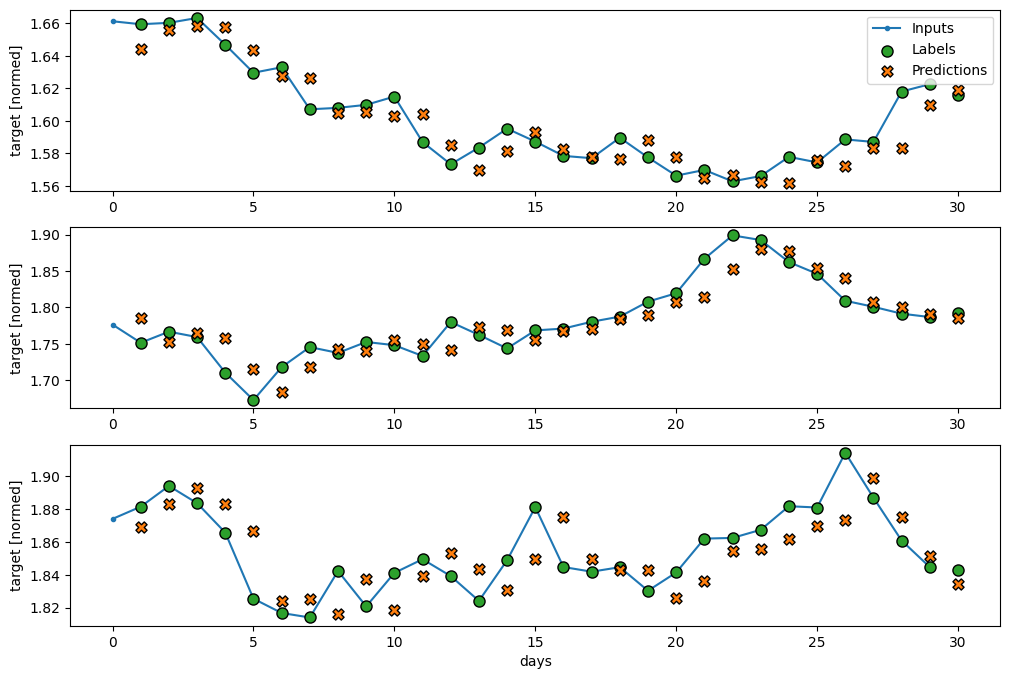

In [66]:
wide_window.plot(lstm_model)


In [67]:
test_window = WindowGenerator(
    input_width=30, label_width=1, shift=1,
    label_columns=['target'])
target_rnn_0=conv_model.predict(test_window.test)
target_rnn_0.shape

37/37 [==============================] - 0s 2ms/step


(721, 1, 1)

In [68]:
target_rnn = np.squeeze(target_rnn_0)
df_rnn = test_df_0.iloc[30:, 0:3]
df_rnn['target_rnn']=target_rnn
df_rnn = df_rnn[['Date', 'devprice', 'target', 'target_rnn']]
df_rnn['pnl']=(df_rnn['target_rnn']/5)*df_rnn['devprice']
df_rnn['sum']=df_rnn["pnl"].cumsum()
sharp=(df_rnn['sum'].mean()*255**0.5)/df_rnn['sum'].std()
print(df_rnn, sharp)

           Date  devprice    target  target_rnn       pnl       sum
3140 2019-02-14 -0.004841  3.719319    3.912484 -0.003788 -0.003788
3141 2019-02-15  0.008962  3.701925    5.119146  0.009175  0.005387
3142 2019-02-18 -0.003788  3.735898    4.101630 -0.003107  0.002280
3143 2019-02-19  0.002145  3.722299    5.062458  0.002172  0.004451
3144 2019-02-20  0.008475  3.730811    5.272617  0.008937  0.013388
...         ...       ...       ...         ...       ...       ...
3885 2021-12-23 -0.008289  5.678280    4.117737 -0.006826  0.247306
3887 2021-12-27 -0.000938  5.632780    3.912633 -0.000734  0.246572
3888 2021-12-28  0.011402  5.628285    5.035957  0.011484  0.258056
3889 2021-12-29 -0.022419  5.694565    4.044464 -0.018134  0.239922
3890 2021-12-30  0.000814  5.571260    3.809526  0.000620  0.240542

[721 rows x 6 columns] 26.388896121518048


In [69]:
#Performance

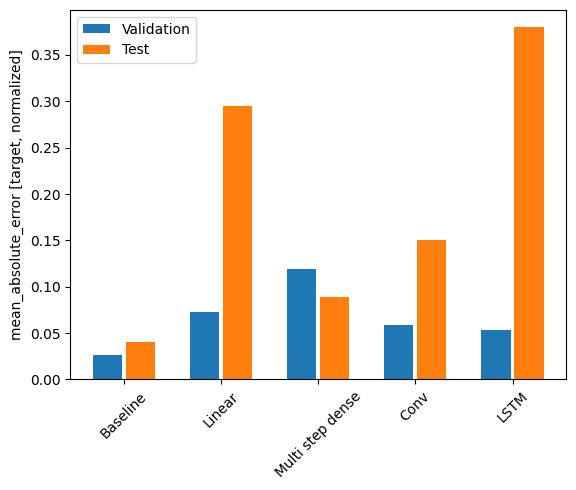

In [70]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [target, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()


In [71]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')


Baseline    : 0.0406
Linear      : 0.2946
Multi step dense: 0.0884
Conv        : 0.1508
LSTM        : 0.3795
